# <u>Feature Engineering & Modelling<u>

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Loading data with pandas

In [2]:
eda_data = pd.read_csv('clean_data_after_eda.csv')
eda_data.head()

Unnamed: 0                                id  \
0           0  24011ae4ebbe3035111d65fa7c15bc57   
1           1  d29c2c54acc38ff3c0614d0a653813dd   
2           2  764c75f661154dac3a6c254cd082ea7d   
3           3  bba03439a292a1e166f80264c16191cb   
4           4  149d57cf92fc41cf94415803a877cb4b   

                      channel_sales  cons_12m  cons_gas_12m  cons_last_month  \
0  foosdfpfkusacimwkcsosbicdxkicaua         0         54946                0   
1                           MISSING      4660             0                0   
2  foosdfpfkusacimwkcsosbicdxkicaua       544             0                0   
3  lmkebamcaaclubfxadlmueccxoimlema      1584             0                0   
4                           MISSING      4425             0              526   

   date_activ    date_end date_modif_prod date_renewal  ...  \
0  2013-06-15  2016-06-15      2015-11-01   2015-06-23  ...   
1  2009-08-21  2016-08-30      2009-08-21   2015-08-31  ...   
2  2010-04-16  2016-04-16      2010-04-16   2015-04-17  ...   
3  2010-03-30  2016-03-30      2010-03-30   2015-03-31  ...   
4  2010-01-13  2016-03-07      2010-01-13   2015-03-09  ...   

   mean_3m_price_p1_var  mean_3m_price_p2_var  mean_3m_price_p3_var  \
0              0.131756              0.092638              0.036909   
1              0.147600              0.000000              0.000000   
2              0.167798              0.088409              0.000000   
3              0.148586              0.000000              0.000000   
4              0.119906              0.101673              0.073719   

   mean_3m_price_p1_fix  mean_3m_price_p2_fix  mean_3m_price_p3_fix  \
0             42.497907             12.218665              8.145777   
1             44.444710              0.000000              0.000000   
2             44.444710              0.000000              0.000000   
3             44.444710              0.000000              0.000000   
4             40.728885             24.437330             16.291555   

   mean_3m_price_p1 mean_3m_price_p2  mean_3m_price_p3  churn  
0         42.629663        12.311304          8.182687      1  
1         44.592310         0.000000          0.000000      0  
2         44.612508         0.088409          0.000000      0  
3         44.593296         0.000000          0.000000      0  
4         40.848791        24.539003         16.365274      0  

[5 rows x 54 columns]

## Convert Date columns to datetime data types

In [3]:
eda_data["date_activ"] = pd.to_datetime(eda_data["date_activ"], format='%Y-%m-%d')
eda_data["date_end"] = pd.to_datetime(eda_data["date_end"], format='%Y-%m-%d')
eda_data["date_modif_prod"] = pd.to_datetime(eda_data["date_modif_prod"], format='%Y-%m-%d')
eda_data["date_renewal"] = pd.to_datetime(eda_data["date_renewal"], format='%Y-%m-%d')

eda_data.drop(eda_data.columns[0], axis=1, inplace=True)
eda_data.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month date_activ   date_end  \
0         0         54946                0 2013-06-15 2016-06-15   
1      4660             0                0 2009-08-21 2016-08-30   
2       544             0                0 2010-04-16 2016-04-16   
3      1584             0                0 2010-03-30 2016-03-30   
4      4425             0              526 2010-01-13 2016-03-07   

  date_modif_prod date_renewal  forecast_cons_12m  ...  mean_3m_price_p1_var  \
0      2015-11-01   2015-06-23               0.00  ...              0.131756   
1      2009-08-21   2015-08-31             189.95  ...              0.147600   
2      2010-04-16   2015-04-17              47.96  ...              0.167798   
3      2010-03-30   2015-03-31             240.04  ...              0.148586   
4      2010-01-13   2015-03-09             445.75  ...              0.119906   

   mean_3m_price_p2_var  mean_3m_price_p3_var  mean_3m_price_p1_fix  \
0              0.092638              0.036909             42.497907   
1              0.000000              0.000000             44.444710   
2              0.088409              0.000000             44.444710   
3              0.000000              0.000000             44.444710   
4              0.101673              0.073719             40.728885   

   mean_3m_price_p2_fix  mean_3m_price_p3_fix mean_3m_price_p1  \
0             12.218665              8.145777        42.629663   
1              0.000000              0.000000        44.592310   
2              0.000000              0.000000        44.612508   
3              0.000000              0.000000        44.593296   
4             24.437330             16.291555        40.848791   

   mean_3m_price_p2  mean_3m_price_p3  churn  
0         12.311304          8.182687      1  
1          0.000000          0.000000      0  
2          0.088409          0.000000      0  
3          0.000000          0.000000      0  
4         24.539003         16.365274      0  

[5 rows x 53 columns]

# Feature Engineering

In [4]:
price_data = pd.read_csv(r"C:\Users\91965\Downloads\price_data.csv")
price_data["price_date"] = pd.to_datetime(price_data["price_date"], format='%Y-%m-%d')
price_data.head()

id price_date  price_off_peak_var  \
0  038af19179925da21a25619c5a24b745 2015-01-01            0.151367   
1  038af19179925da21a25619c5a24b745 2015-02-01            0.151367   
2  038af19179925da21a25619c5a24b745 2015-03-01            0.151367   
3  038af19179925da21a25619c5a24b745 2015-04-01            0.149626   
4  038af19179925da21a25619c5a24b745 2015-05-01            0.149626   

   price_peak_var  price_mid_peak_var  price_off_peak_fix  price_peak_fix  \
0             0.0                 0.0           44.266931             0.0   
1             0.0                 0.0           44.266931             0.0   
2             0.0                 0.0           44.266931             0.0   
3             0.0                 0.0           44.266931             0.0   
4             0.0                 0.0           44.266931             0.0   

   price_mid_peak_fix  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0

### The difference between off-peak prices in December and preceding January the preceding year.

In [5]:
monthly_price_by_id = price_data.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 
                                                                    'price_off_peak_fix': 'mean'}).reset_index()

jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()

diff = pd.merge(

    dec_prices.rename(columns={'price_off_peak_var': 'dec_1', 'price_off_peak_fix': 'dec_2'}), 
    jan_prices.drop(columns='price_date'), on='id'
)
diff['offpeak_diff_dec_january_energy'] = diff['dec_1'] - diff['price_off_peak_var']
diff['offpeak_diff_dec_january_power'] = diff['dec_2'] - diff['price_off_peak_fix']
diff = diff[['id', 'offpeak_diff_dec_january_energy','offpeak_diff_dec_january_power']]

diff.head()

id  offpeak_diff_dec_january_energy  \
0  0002203ffbb812588b632b9e628cc38d                        -0.006192   
1  0004351ebdd665e6ee664792efc4fd13                        -0.004104   
2  0010bcc39e42b3c2131ed2ce55246e3c                         0.050443   
3  0010ee3855fdea87602a5b7aba8e42de                        -0.010018   
4  00114d74e963e47177db89bc70108537                        -0.003994   

   offpeak_diff_dec_january_power  
0                        0.162916  
1                        0.177779  
2                        1.500000  
3                        0.162916  
4                       -0.000001

In [6]:
eda_data = pd.merge(eda_data, diff, on='id')
eda_data.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month date_activ   date_end  \
0         0         54946                0 2013-06-15 2016-06-15   
1      4660             0                0 2009-08-21 2016-08-30   
2       544             0                0 2010-04-16 2016-04-16   
3      1584             0                0 2010-03-30 2016-03-30   
4      4425             0              526 2010-01-13 2016-03-07   

  date_modif_prod date_renewal  forecast_cons_12m  ...  mean_3m_price_p3_var  \
0      2015-11-01   2015-06-23               0.00  ...              0.036909   
1      2009-08-21   2015-08-31             189.95  ...              0.000000   
2      2010-04-16   2015-04-17              47.96  ...              0.000000   
3      2010-03-30   2015-03-31             240.04  ...              0.000000   
4      2010-01-13   2015-03-09             445.75  ...              0.073719   

   mean_3m_price_p1_fix  mean_3m_price_p2_fix  mean_3m_price_p3_fix  \
0             42.497907             12.218665              8.145777   
1             44.444710              0.000000              0.000000   
2             44.444710              0.000000              0.000000   
3             44.444710              0.000000              0.000000   
4             40.728885             24.437330             16.291555   

   mean_3m_price_p1  mean_3m_price_p2 mean_3m_price_p3  churn  \
0         42.629663         12.311304         8.182687      1   
1         44.592310          0.000000         0.000000      0   
2         44.612508          0.088409         0.000000      0   
3         44.593296          0.000000         0.000000      0   
4         40.848791         24.539003        16.365274      0   

   offpeak_diff_dec_january_energy  offpeak_diff_dec_january_power  
0                         0.020057                        3.700961  
1                        -0.003767                        0.177779  
2                        -0.004670                        0.177779  
3                        -0.004547                        0.177779  
4                        -0.006192                        0.162916  

[5 rows x 55 columns]

### Average price changes as time passes

In [7]:
mean_prices = price_data.groupby(['id']).agg({'price_off_peak_var': 'mean', 'price_peak_var': 'mean', 
                                              'price_mid_peak_var': 'mean', 'price_off_peak_fix': 'mean', 
                                              'price_peak_fix': 'mean', 'price_mid_peak_fix': 'mean'}).reset_index()
mean_prices['off_peak_peak_var_mean_diff'] = mean_prices['price_off_peak_var'] - mean_prices['price_peak_var']
mean_prices['peak_mid_peak_var_mean_diff'] = mean_prices['price_peak_var'] - mean_prices['price_mid_peak_var']
mean_prices['off_peak_mid_peak_var_mean_diff'] = mean_prices['price_off_peak_var'] - mean_prices['price_mid_peak_var']
mean_prices['off_peak_peak_fix_mean_diff'] = mean_prices['price_off_peak_fix'] - mean_prices['price_peak_fix']
mean_prices['peak_mid_peak_fix_mean_diff'] = mean_prices['price_peak_fix'] - mean_prices['price_mid_peak_fix']
mean_prices['off_peak_mid_peak_fix_mean_diff'] = mean_prices['price_off_peak_fix'] - mean_prices['price_mid_peak_fix']

columns = ['id', 'off_peak_peak_var_mean_diff', 'peak_mid_peak_var_mean_diff', 'off_peak_mid_peak_var_mean_diff', 
           'off_peak_peak_fix_mean_diff', 'peak_mid_peak_fix_mean_diff', 'off_peak_mid_peak_fix_mean_diff']

eda_data = pd.merge(eda_data, mean_prices[columns], on='id')
eda_data.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month date_activ   date_end  \
0         0         54946                0 2013-06-15 2016-06-15   
1      4660             0                0 2009-08-21 2016-08-30   
2       544             0                0 2010-04-16 2016-04-16   
3      1584             0                0 2010-03-30 2016-03-30   
4      4425             0              526 2010-01-13 2016-03-07   

  date_modif_prod date_renewal  forecast_cons_12m  ...  mean_3m_price_p3  \
0      2015-11-01   2015-06-23               0.00  ...          8.182687   
1      2009-08-21   2015-08-31             189.95  ...          0.000000   
2      2010-04-16   2015-04-17              47.96  ...          0.000000   
3      2010-03-30   2015-03-31             240.04  ...          0.000000   
4      2010-01-13   2015-03-09             445.75  ...         16.365274   

   churn  offpeak_diff_dec_january_energy  offpeak_diff_dec_january_power  \
0      1                         0.020057                        3.700961   
1      0                        -0.003767                        0.177779   
2      0                        -0.004670                        0.177779   
3      0                        -0.004547                        0.177779   
4      0                        -0.006192                        0.162916   

   off_peak_peak_var_mean_diff  peak_mid_peak_var_mean_diff  \
0                     0.024038                     0.034219   
1                     0.142485                     0.007124   
2                     0.082090                     0.088421   
3                     0.151210                     0.000000   
4                     0.020536                     0.030773   

  off_peak_mid_peak_var_mean_diff  off_peak_peak_fix_mean_diff  \
0                        0.058257                    18.590255   
1                        0.149609                    44.311375   
2                        0.170512                    44.385450   
3                        0.151210                    44.400265   
4                        0.051309                    16.275263   

   peak_mid_peak_fix_mean_diff  off_peak_mid_peak_fix_mean_diff  
0                     7.450670                        26.040925  
1                     0.000000                        44.311375  
2                     0.000000                        44.385450  
3                     0.000000                        44.400265  
4                     8.137629                        24.412893  

[5 rows x 61 columns]

### Max price changes across periods and months

In [8]:
mean_prices_by_month = price_data.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 
                                                                     'price_peak_var': 'mean', 
                                                                     'price_mid_peak_var': 'mean', 
                                                                     'price_off_peak_fix': 'mean', 
                                                                     'price_peak_fix': 'mean', 
                                                                     'price_mid_peak_fix': 'mean'}).reset_index()

mean_prices_by_month['off_peak_peak_var_mean_diff'] = mean_prices_by_month['price_off_peak_var'] - mean_prices_by_month['price_peak_var']
mean_prices_by_month['peak_mid_peak_var_mean_diff'] = mean_prices_by_month['price_peak_var'] - mean_prices_by_month['price_mid_peak_var']
mean_prices_by_month['off_peak_mid_peak_var_mean_diff'] = mean_prices_by_month['price_off_peak_var'] - mean_prices_by_month['price_mid_peak_var']
mean_prices_by_month['off_peak_peak_fix_mean_diff'] = mean_prices_by_month['price_off_peak_fix'] - mean_prices_by_month['price_peak_fix']
mean_prices_by_month['peak_mid_peak_fix_mean_diff'] = mean_prices_by_month['price_peak_fix'] - mean_prices_by_month['price_mid_peak_fix']
mean_prices_by_month['off_peak_mid_peak_fix_mean_diff'] = mean_prices_by_month['price_off_peak_fix'] - mean_prices_by_month['price_mid_peak_fix']

max_diff_across_periods_months = mean_prices_by_month.groupby(['id']).agg({
    'off_peak_peak_var_mean_diff': 'max',
    'peak_mid_peak_var_mean_diff': 'max',
    'off_peak_mid_peak_var_mean_diff': 'max',
    'off_peak_peak_fix_mean_diff': 'max',
    'peak_mid_peak_fix_mean_diff': 'max',
    'off_peak_mid_peak_fix_mean_diff': 'max'
}).reset_index().rename(
    columns={
        'off_peak_peak_var_mean_diff': 'off_peak_peak_var_max_monthly_diff',
        'peak_mid_peak_var_mean_diff': 'peak_mid_peak_var_max_monthly_diff',
        'off_peak_mid_peak_var_mean_diff': 'off_peak_mid_peak_var_max_monthly_diff',
        'off_peak_peak_fix_mean_diff': 'off_peak_peak_fix_max_monthly_diff',
        'peak_mid_peak_fix_mean_diff': 'peak_mid_peak_fix_max_monthly_diff',
        'off_peak_mid_peak_fix_mean_diff': 'off_peak_mid_peak_fix_max_monthly_diff'
    }
)

columns = ['id', 'off_peak_peak_var_max_monthly_diff', 'peak_mid_peak_var_max_monthly_diff', 
           'off_peak_mid_peak_var_max_monthly_diff', 'off_peak_peak_fix_max_monthly_diff', 
           'peak_mid_peak_fix_max_monthly_diff', 'off_peak_mid_peak_fix_max_monthly_diff']

eda_data = pd.merge(eda_data, max_diff_across_periods_months[columns], on='id')
eda_data.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month date_activ   date_end  \
0         0         54946                0 2013-06-15 2016-06-15   
1      4660             0                0 2009-08-21 2016-08-30   
2       544             0                0 2010-04-16 2016-04-16   
3      1584             0                0 2010-03-30 2016-03-30   
4      4425             0              526 2010-01-13 2016-03-07   

  date_modif_prod date_renewal  forecast_cons_12m  ...  \
0      2015-11-01   2015-06-23               0.00  ...   
1      2009-08-21   2015-08-31             189.95  ...   
2      2010-04-16   2015-04-17              47.96  ...   
3      2010-03-30   2015-03-31             240.04  ...   
4      2010-01-13   2015-03-09             445.75  ...   

   off_peak_mid_peak_var_mean_diff  off_peak_peak_fix_mean_diff  \
0                         0.058257                    18.590255   
1                         0.149609                    44.311375   
2                         0.170512                    44.385450   
3                         0.151210                    44.400265   
4                         0.051309                    16.275263   

   peak_mid_peak_fix_mean_diff  off_peak_mid_peak_fix_mean_diff  \
0                     7.450670                        26.040925   
1                     0.000000                        44.311375   
2                     0.000000                        44.385450   
3                     0.000000                        44.400265   
4                     8.137629                        24.412893   

   off_peak_peak_var_max_monthly_diff  peak_mid_peak_var_max_monthly_diff  \
0                            0.060550                            0.085483   
1                            0.151367                            0.085483   
2                            0.084587                            0.089162   
3                            0.153133                            0.000000   
4                            0.022225                            0.033743   

  off_peak_mid_peak_var_max_monthly_diff  off_peak_peak_fix_max_monthly_diff  \
0                               0.146033                           44.266930   
1                               0.151367                           44.444710   
2                               0.172468                           44.444710   
3                               0.153133                           44.444710   
4                               0.055866                           16.291555   

   peak_mid_peak_fix_max_monthly_diff  off_peak_mid_peak_fix_max_monthly_diff  
0                            8.145775                                44.26693  
1                            0.000000                                44.44471  
2                            0.000000                                44.44471  
3                            0.000000                                44.44471  
4                            8.145775                                24.43733  

[5 rows x 67 columns]

### How long a company has been a client of PowerCo.

In [9]:
eda_data['tenure'] = ((eda_data['date_end'] - eda_data['date_activ'])/ np.timedelta64(1, 'Y')).astype(int)
eda_data.groupby(['tenure']).agg({'churn': 'mean'}).sort_values(by='churn', ascending=False)

churn
tenure          
3       0.143836
2       0.133080
4       0.125756
13      0.095238
5       0.085425
12      0.083333
6       0.080713
7       0.073394
11      0.063584
8       0.048000
9       0.024096
10      0.020000

Based on the above, it is evident that customers who have been with the company for a shorter period, specifically four months or less, are more likely to churn compared to those with longer tenure. Notably, the difference between customers with four months and five months of tenure is approximately 4%, indicating a significant increase in the risk of customer churn. This finding suggests that retaining a customer beyond the four-month mark is a noteworthy achievement in terms of long-term customer retention.

### Transforming dates into months

In [10]:
def convert_months(reference_date, eda_data, column):
   
    time_delta = reference_date - eda_data[column]
    months = (time_delta / np.timedelta64(1, 'M')).astype(int)
    return months

In [11]:
reference_date = datetime(2016, 1, 1)

eda_data['months_activ'] = convert_months(reference_date, eda_data, 'date_activ')
eda_data['months_to_end'] = -convert_months(reference_date, eda_data, 'date_end')
eda_data['months_modif_prod'] = convert_months(reference_date, eda_data, 'date_modif_prod')
eda_data['months_renewal'] = convert_months(reference_date, eda_data, 'date_renewal')

In [12]:
remove = ['date_activ', 'date_end', 'date_modif_prod', 'date_renewal']

eda_data = eda_data.drop(columns=remove)
eda_data.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
0         0         54946                0               0.00   
1      4660             0                0             189.95   
2       544             0                0              47.96   
3      1584             0                0             240.04   
4      4425             0              526             445.75   

   forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
0                   0                       0.0                     1.78   
1                   0                       0.0                    16.27   
2                   0                       0.0                    38.72   
3                   0                       0.0                    19.83   
4                 526                       0.0                   131.73   

   forecast_price_energy_off_peak  ...  peak_mid_peak_var_max_monthly_diff  \
0                        0.114481  ...                            0.085483   
1                        0.145711  ...                            0.085483   
2                        0.165794  ...                            0.089162   
3                        0.146694  ...                            0.000000   
4                        0.116900  ...                            0.033743   

   off_peak_mid_peak_var_max_monthly_diff off_peak_peak_fix_max_monthly_diff  \
0                                0.146033                          44.266930   
1                                0.151367                          44.444710   
2                                0.172468                          44.444710   
3                                0.153133                          44.444710   
4                                0.055866                          16.291555   

   peak_mid_peak_fix_max_monthly_diff  off_peak_mid_peak_fix_max_monthly_diff  \
0                            8.145775                                44.26693   
1                            0.000000                                44.44471   
2                            0.000000                                44.44471   
3                            0.000000                                44.44471   
4                            8.145775                                24.43733   

   tenure  months_activ  months_to_end  months_modif_prod months_renewal  
0       3            30              5                  2              6  
1       7            76              7                 76              4  
2       6            68              3                 68              8  
3       6            69              2                 69              9  
4       6            71              2                 71              9  

[5 rows x 68 columns]

### Transforming Boolean data

In [13]:
eda_data['has_gas'] = eda_data['has_gas'].replace(['t', 'f'], [1, 0])
eda_data.groupby(['has_gas']).agg({'churn': 'mean'})

churn
has_gas          
0        0.100544
1        0.081887

### check the value of the categorical value

In [14]:
eda_data['channel_sales'] = eda_data['channel_sales'].astype('category')
eda_data['origin_up'] = eda_data['origin_up'].astype('category')
print(eda_data['channel_sales'].value_counts())
print("\n ---------------------------------------- \n")
print(eda_data['origin_up'].value_counts())

foosdfpfkusacimwkcsosbicdxkicaua    6753
MISSING                             3725
lmkebamcaaclubfxadlmueccxoimlema    1843
usilxuppasemubllopkaafesmlibmsdf    1375
ewpakwlliwisiwduibdlfmalxowmwpci     893
sddiedcslfslkckwlfkdpoeeailfpeds      11
epumfxlbckeskwekxbiuasklxalciiuu       3
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: channel_sales, dtype: int64

 ---------------------------------------- 

lxidpiddsbxsbosboudacockeimpuepw    7096
kamkkxfxxuwbdslkwifmmcsiusiuosws    4294
ldkssxwpmemidmecebumciepifcamkci    3148
MISSING                               64
usapbepcfoloekilkwsdiboslwaxobdp       2
ewxeelcelemmiwuafmddpobolfuxioce       1
Name: origin_up, dtype: int64


### Transforming Categorical Data

In [15]:
eda_data = pd.get_dummies(eda_data, columns=['channel_sales', 'origin_up'])
eda_data.head()

id  cons_12m  cons_gas_12m  cons_last_month  \
0  24011ae4ebbe3035111d65fa7c15bc57         0         54946                0   
1  d29c2c54acc38ff3c0614d0a653813dd      4660             0                0   
2  764c75f661154dac3a6c254cd082ea7d       544             0                0   
3  bba03439a292a1e166f80264c16191cb      1584             0                0   
4  149d57cf92fc41cf94415803a877cb4b      4425             0              526   

   forecast_cons_12m  forecast_cons_year  forecast_discount_energy  \
0               0.00                   0                       0.0   
1             189.95                   0                       0.0   
2              47.96                   0                       0.0   
3             240.04                   0                       0.0   
4             445.75                 526                       0.0   

   forecast_meter_rent_12m  forecast_price_energy_off_peak  \
0                     1.78                        0.114481   
1                    16.27                        0.145711   
2                    38.72                        0.165794   
3                    19.83                        0.146694   
4                   131.73                        0.116900   

   forecast_price_energy_peak  ...  \
0                    0.098142  ...   
1                    0.000000  ...   
2                    0.087899  ...   
3                    0.000000  ...   
4                    0.100015  ...   

   channel_sales_foosdfpfkusacimwkcsosbicdxkicaua  \
0                                               1   
1                                               0   
2                                               1   
3                                               0   
4                                               0   

   channel_sales_lmkebamcaaclubfxadlmueccxoimlema  \
0                                               0   
1                                               0   
2                                               0   
3                                               1   
4                                               0   

   channel_sales_sddiedcslfslkckwlfkdpoeeailfpeds  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   channel_sales_usilxuppasemubllopkaafesmlibmsdf  origin_up_MISSING  \
0                                               0                  0   
1                                               0                  0   
2                                               0                  0   
3                                               0                  0   
4                                               0                  0   

   origin_up_ewxeelcelemmiwuafmddpobolfuxioce  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws  \
0                                           0   
1                                           1   
2                                           1   
3                                           1   
4                                           1   

   origin_up_ldkssxwpmemidmecebumciepifcamkci  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   origin_up_lxidpiddsbxsbosboudacockeimpuepw  \
0                                           1   
1                                           0   
2                                           0   
3                                           0   
4        

### Drop column who have less in number

In [16]:
eda_data = eda_data.drop(columns=['channel_sales_sddiedcslfslkckwlfkdpoeeailfpeds',
                                  'channel_sales_epumfxlbckeskwekxbiuasklxalciiuu',
                                  'channel_sales_fixdbufsefwooaasfcxdxadsiekoceaa',
                                  'origin_up_MISSING',
                                  'origin_up_usapbepcfoloekilkwsdiboslwaxobdp',
                                  'origin_up_ewxeelcelemmiwuafmddpobolfuxioce'])
eda_data.head()

id  cons_12m  cons_gas_12m  cons_last_month  \
0  24011ae4ebbe3035111d65fa7c15bc57         0         54946                0   
1  d29c2c54acc38ff3c0614d0a653813dd      4660             0                0   
2  764c75f661154dac3a6c254cd082ea7d       544             0                0   
3  bba03439a292a1e166f80264c16191cb      1584             0                0   
4  149d57cf92fc41cf94415803a877cb4b      4425             0              526   

   forecast_cons_12m  forecast_cons_year  forecast_discount_energy  \
0               0.00                   0                       0.0   
1             189.95                   0                       0.0   
2              47.96                   0                       0.0   
3             240.04                   0                       0.0   
4             445.75                 526                       0.0   

   forecast_meter_rent_12m  forecast_price_energy_off_peak  \
0                     1.78                        0.114481   
1                    16.27                        0.145711   
2                    38.72                        0.165794   
3                    19.83                        0.146694   
4                   131.73                        0.116900   

   forecast_price_energy_peak  ...  months_modif_prod  months_renewal  \
0                    0.098142  ...                  2               6   
1                    0.000000  ...                 76               4   
2                    0.087899  ...                 68               8   
3                    0.000000  ...                 69               9   
4                    0.100015  ...                 71               9   

   channel_sales_MISSING  channel_sales_ewpakwlliwisiwduibdlfmalxowmwpci  \
0                      0                                               0   
1                      1                                               0   
2                      0                                               0   
3                      0                                               0   
4                      1                                               0   

   channel_sales_foosdfpfkusacimwkcsosbicdxkicaua  \
0                                               1   
1                                               0   
2                                               1   
3                                               0   
4                                               0   

   channel_sales_lmkebamcaaclubfxadlmueccxoimlema  \
0                                               0   
1                                               0   
2                                               0   
3                                               1   
4                                               0   

   channel_sales_usilxuppasemubllopkaafesmlibmsdf  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws  \
0                                           0   
1                                           1   
2                                           1   
3                                           1   
4                                           1   

   origin_up_ldkssxwpmemidmecebumciepifcamkci  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   origin_up_lxidpiddsbxsbosboudacockeimpuepw  
0                                           1  
1                                           0  
2                                           0  
3                                           0  
4                                           0  

[5 rows x 74 columns]

### Transforming numerical data

In [17]:
skewed = [
    'cons_12m', 
    'cons_gas_12m', 
    'cons_last_month',
    'forecast_cons_12m', 
    'forecast_cons_year', 
    'forecast_discount_energy',
    'forecast_meter_rent_12m', 
    'forecast_price_energy_off_peak',
    'forecast_price_energy_peak', 
    'forecast_price_pow_off_peak',
    'margin_gross_pow_ele', 
    'margin_net_pow_ele',
    'imp_cons'
]
eda_data[skewed].describe().T

count           mean            std  min  \
cons_12m                        14605.0  159230.267032  573483.629064  0.0   
cons_gas_12m                    14605.0   28091.082506  162978.563803  0.0   
cons_last_month                 14605.0   16091.371448   64366.262314  0.0   
forecast_cons_12m               14605.0    1868.638618    2387.651549  0.0   
forecast_cons_year              14605.0    1399.858747    3247.876793  0.0   
forecast_discount_energy        14605.0       0.966450       5.108355  0.0   
forecast_meter_rent_12m         14605.0      63.090448      66.166636  0.0   
forecast_price_energy_off_peak  14605.0       0.137282       0.024623  0.0   
forecast_price_energy_peak      14605.0       0.050488       0.049037  0.0   
forecast_price_pow_off_peak     14605.0      43.130085       4.486140  0.0   
margin_gross_pow_ele            14605.0      24.564667      20.231790  0.0   
margin_net_pow_ele              14605.0      24.562063      20.230898  0.0   
imp_cons                        14605.0     152.797357     341.378712  0.0   

                                        25%           50%           75%  \
cons_12m                        5674.000000  14116.000000  40764.000000   
cons_gas_12m                       0.000000      0.000000      0.000000   
cons_last_month                    0.000000    793.000000   3383.000000   
forecast_cons_12m                494.980000   1112.610000   2402.270000   
forecast_cons_year                 0.000000    314.000000   1746.000000   
forecast_discount_energy           0.000000      0.000000      0.000000   
forecast_meter_rent_12m           16.180000     18.800000    131.030000   
forecast_price_energy_off_peak     0.116340      0.143166      0.146348   
forecast_price_energy_peak         0.000000      0.084138      0.098837   
forecast_price_pow_off_peak       40.606701     44.311378     44.311378   
margin_gross_pow_ele              14.280000     21.640000     29.880000   
margin_net_pow_ele                14.280000     21.640000     29.880000   
imp_cons                           0.000000     37.400000    193.990000   

                                         max  
cons_12m                        6.207104e+06  
cons_gas_12m                    4.154590e+06  
cons_last_month                 7.712030e+05  
forecast_cons_12m               8.290283e+04  
forecast_cons_year              1.753750e+05  
forecast_discount_energy        3.000000e+01  
forecast_meter_rent_12m         5.993100e+02  
forecast_price_energy_off_peak  2.739630e-01  
forecast_price_energy_peak      1.959750e-01  
forecast_price_pow_off_peak     5.926638e+01  
margin_gross_pow_ele            3.746400e+02  
margin_net_pow_ele              3.746400e+02  
imp_cons                        1.504279e+04

We can see that the standard deviation for most of these features is quite high.

### Applying log10 transformation

In [18]:
eda_data["cons_12m"] = np.log10(eda_data["cons_12m"] + 1)
eda_data["cons_gas_12m"] = np.log10(eda_data["cons_gas_12m"] + 1)
eda_data["cons_last_month"] = np.log10(eda_data["cons_last_month"] + 1)
eda_data["forecast_cons_12m"] = np.log10(eda_data["forecast_cons_12m"] + 1)
eda_data["forecast_cons_year"] = np.log10(eda_data["forecast_cons_year"] + 1)
eda_data["forecast_meter_rent_12m"] = np.log10(eda_data["forecast_meter_rent_12m"] + 1)
eda_data["imp_cons"] = np.log10(eda_data["imp_cons"] + 1)
eda_data["margin_gross_pow_ele"] = np.log10(eda_data["margin_gross_pow_ele"] + 1)
eda_data["margin_net_pow_ele"] = np.log10(eda_data["margin_net_pow_ele"] + 1)

### Again Checking the statistics of the skewed features

In [19]:
eda_data[skewed].describe().T

count       mean       std  min        25%  \
cons_12m                        14605.0   4.223945  0.884545  0.0   3.753966   
cons_gas_12m                    14605.0   0.778978  1.716828  0.0   0.000000   
cons_last_month                 14605.0   2.264801  1.769266  0.0   0.000000   
forecast_cons_12m               14605.0   2.962162  0.683612  0.0   2.695464   
forecast_cons_year              14605.0   1.784733  1.584972  0.0   0.000000   
forecast_discount_energy        14605.0   0.966450  5.108355  0.0   0.000000   
forecast_meter_rent_12m         14605.0   1.517233  0.571489  0.0   1.235023   
forecast_price_energy_off_peak  14605.0   0.137282  0.024623  0.0   0.116340   
forecast_price_energy_peak      14605.0   0.050488  0.049037  0.0   0.000000   
forecast_price_pow_off_peak     14605.0  43.130085  4.486140  0.0  40.606701   
margin_gross_pow_ele            14605.0   1.300002  0.340546  0.0   1.184123   
margin_net_pow_ele              14605.0   1.299958  0.340539  0.0   1.184123   
imp_cons                        14605.0   1.240835  1.138314  0.0   0.000000   

                                      50%        75%        max  
cons_12m                         4.149742   4.610287   6.792889  
cons_gas_12m                     0.000000   0.000000   6.618528  
cons_last_month                  2.899821   3.529430   5.887169  
forecast_cons_12m                3.046733   3.380803   4.918575  
forecast_cons_year               2.498311   3.242293   5.243970  
forecast_discount_energy         0.000000   0.000000  30.000000  
forecast_meter_rent_12m          1.296665   2.120673   2.778376  
forecast_price_energy_off_peak   0.143166   0.146348   0.273963  
forecast_price_energy_peak       0.084138   0.098837   0.195975  
forecast_price_pow_off_peak     44.311378  44.311378  59.266378  
margin_gross_pow_ele             1.354876   1.489677   2.574772  
margin_net_pow_ele               1.354876   1.489677   2.574772  
imp_cons                         1.584331   2.290012   4.177357

## Correlation Matrix

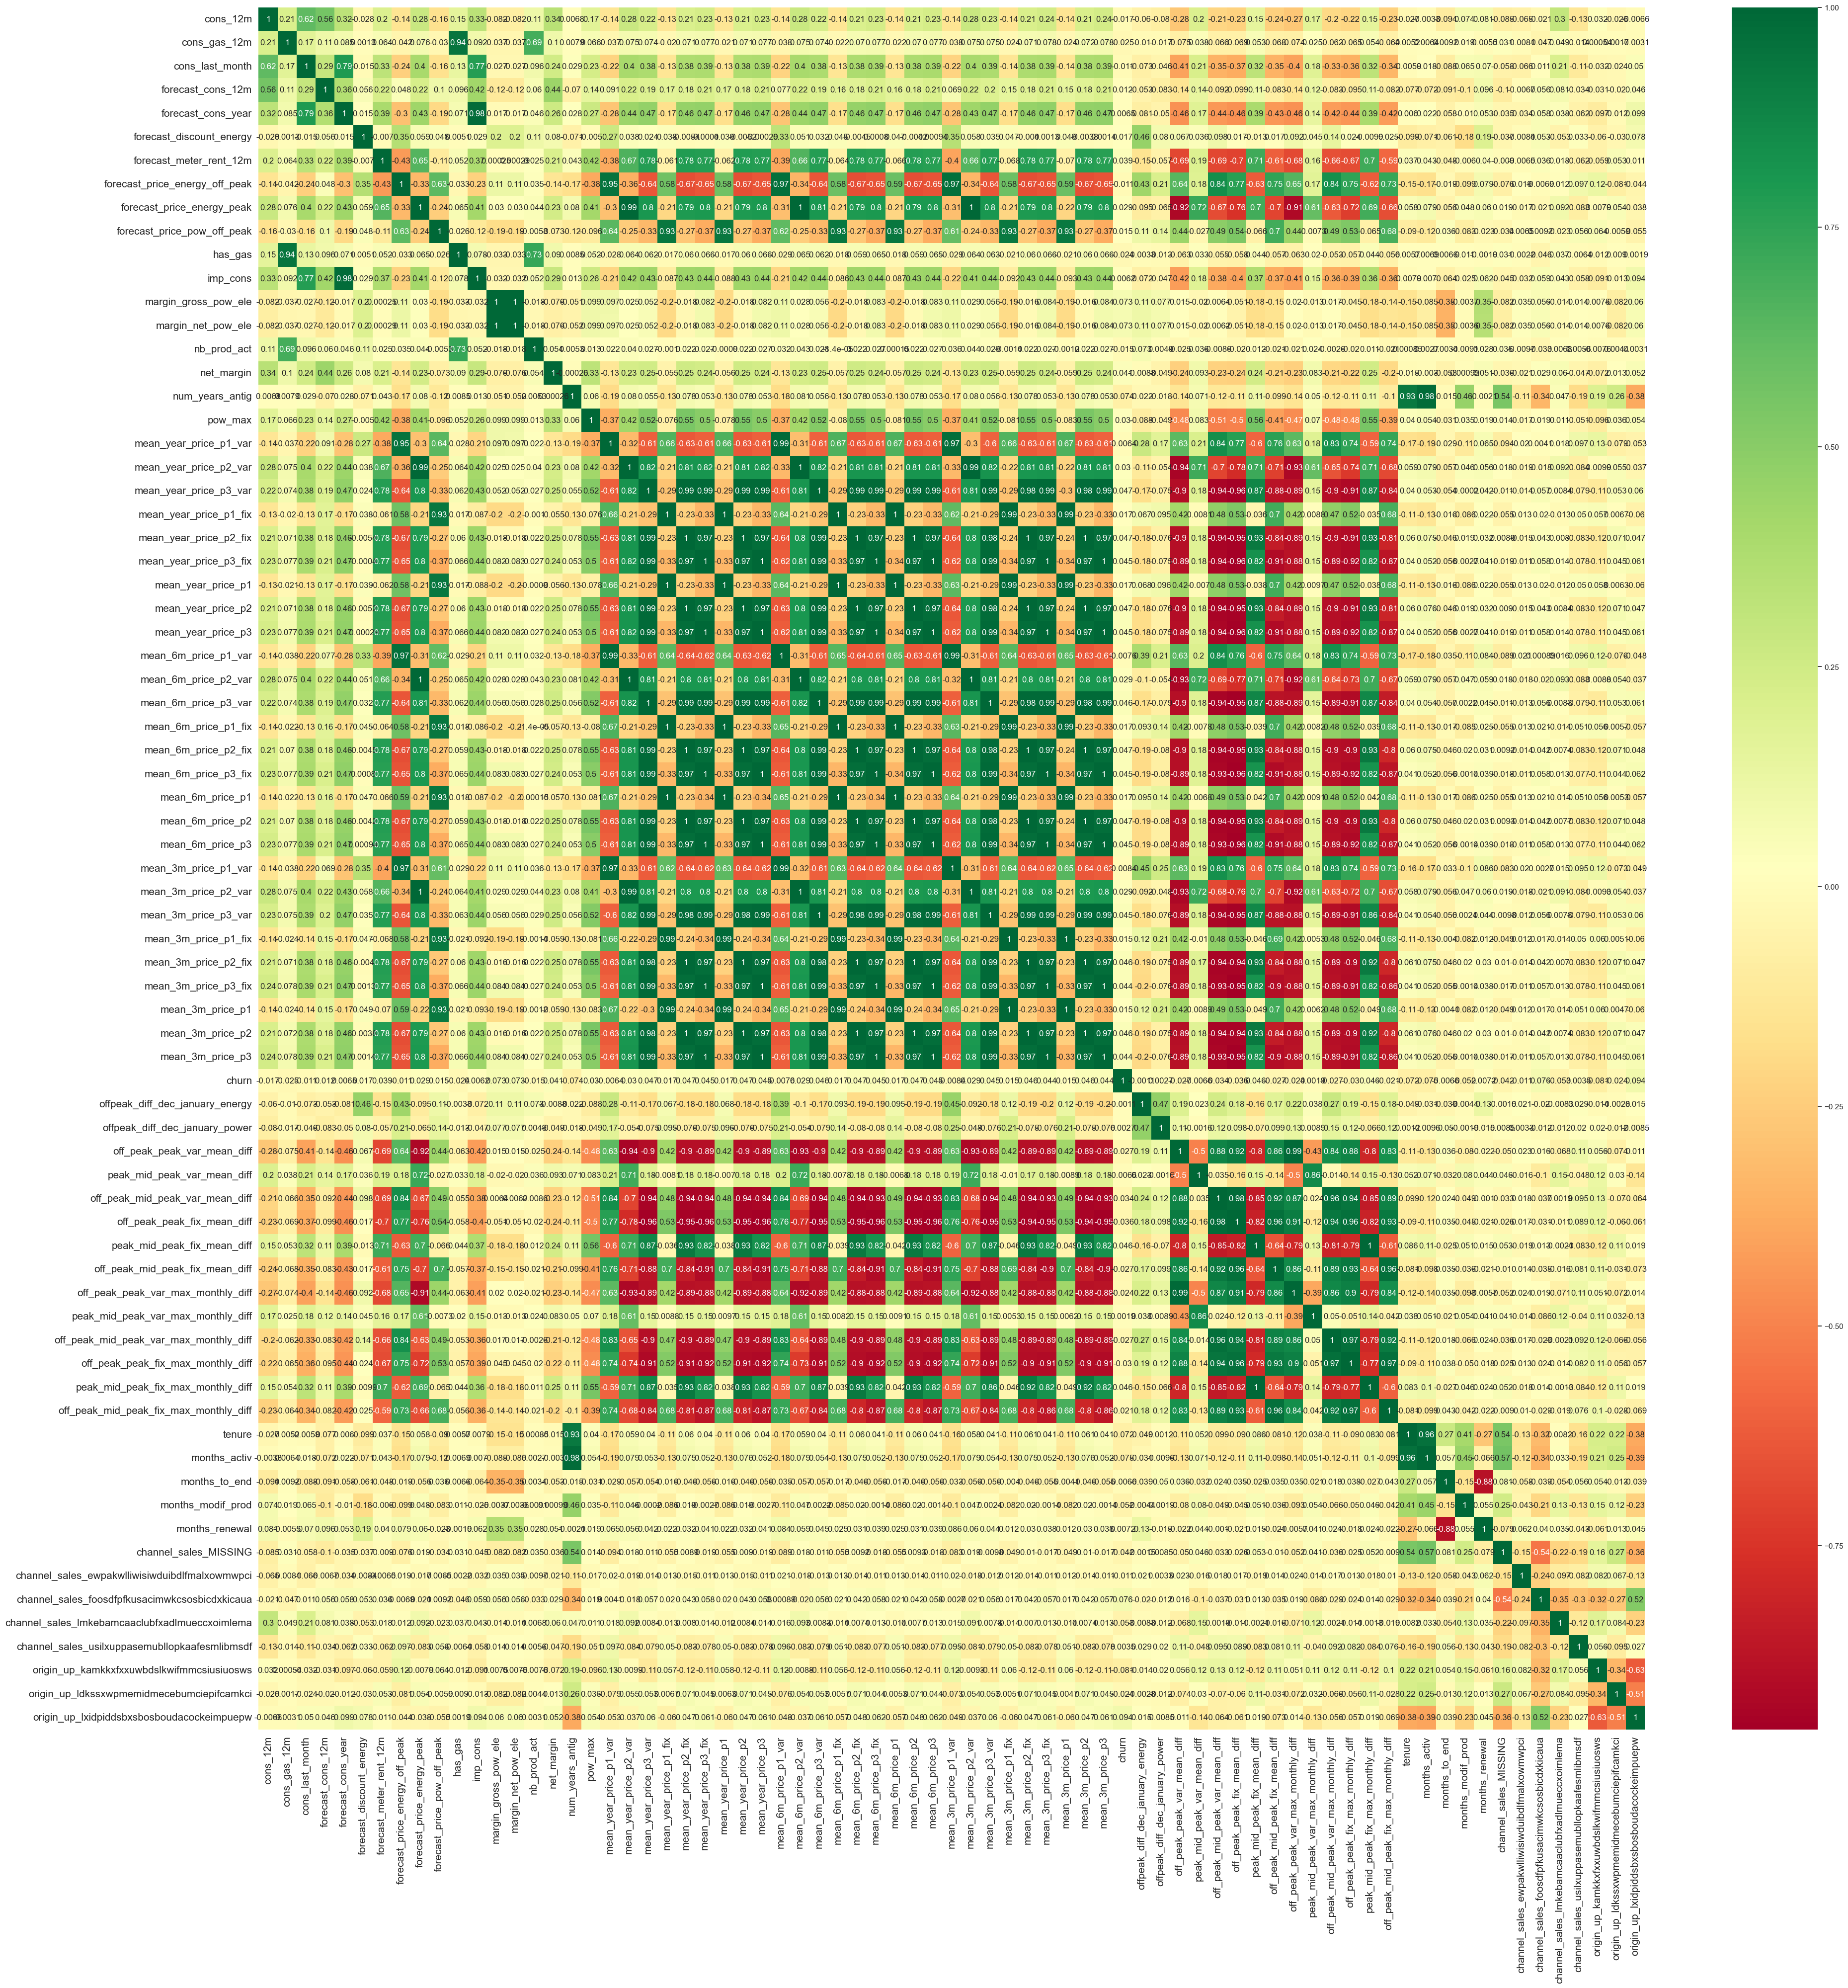

In [20]:
correlation = eda_data.corr()
plt.figure(figsize=(45,45))
sns.heatmap(correlation, xticklabels=correlation.columns.values, yticklabels=correlation.columns.values, annot = True, 
            annot_kws={'size':12},cmap='RdYlGn')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

#### I will remove two variables(`num_years_antig` and `forecast_cons_year`) which exhibit a high correlation with other independent features.

In [21]:
eda_data = eda_data.drop(columns=['num_years_antig', 'forecast_cons_year'])
eda_data.head()

id  cons_12m  cons_gas_12m  cons_last_month  \
0  24011ae4ebbe3035111d65fa7c15bc57  0.000000      4.739944         0.000000   
1  d29c2c54acc38ff3c0614d0a653813dd  3.668479      0.000000         0.000000   
2  764c75f661154dac3a6c254cd082ea7d  2.736397      0.000000         0.000000   
3  bba03439a292a1e166f80264c16191cb  3.200029      0.000000         0.000000   
4  149d57cf92fc41cf94415803a877cb4b  3.646011      0.000000         2.721811   

   forecast_cons_12m  forecast_discount_energy  forecast_meter_rent_12m  \
0           0.000000                       0.0                 0.444045   
1           2.280920                       0.0                 1.237292   
2           1.689841                       0.0                 1.599009   
3           2.382089                       0.0                 1.318689   
4           2.650065                       0.0                 2.122969   

   forecast_price_energy_off_peak  forecast_price_energy_peak  \
0                        0.114481                    0.098142   
1                        0.145711                    0.000000   
2                        0.165794                    0.087899   
3                        0.146694                    0.000000   
4                        0.116900                    0.100015   

   forecast_price_pow_off_peak  ...  months_modif_prod  months_renewal  \
0                    40.606701  ...                  2               6   
1                    44.311378  ...                 76               4   
2                    44.311378  ...                 68               8   
3                    44.311378  ...                 69               9   
4                    40.606701  ...                 71               9   

   channel_sales_MISSING  channel_sales_ewpakwlliwisiwduibdlfmalxowmwpci  \
0                      0                                               0   
1                      1                                               0   
2                      0                                               0   
3                      0                                               0   
4                      1                                               0   

   channel_sales_foosdfpfkusacimwkcsosbicdxkicaua  \
0                                               1   
1                                               0   
2                                               1   
3                                               0   
4                                               0   

   channel_sales_lmkebamcaaclubfxadlmueccxoimlema  \
0                                               0   
1                                               0   
2                                               0   
3                                               1   
4                                               0   

   channel_sales_usilxuppasemubllopkaafesmlibmsdf  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws  \
0                                           0   
1                                           1   
2                                           1   
3                                           1   
4                                           1   

   origin_up_ldkssxwpmemidmecebumciepifcamkci  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   origin_up_lxidpiddsbxsbosboudacockeimpuepw  
0                                           1  
1                                           0  
2                                           0  
3                                           0  
4                    

## Building Prediction Model using Random Forest Classifier

#### First copy the original eda_data and define X and y

In [22]:
train_df = eda_data.copy()

X = eda_data.drop(columns=['id', 'churn'])
y = eda_data['churn']

### Split data into train and test

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Checking shape of train and test data

In [24]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(10953, 70)
(10953,)
(3652, 70)
(3652,)


### Fit the data

In [25]:
rf_classifier = RandomForestClassifier(n_estimators = 1000, criterion = 'entropy', random_state = 0)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=1000, random_state=0)

### Model prediction on X_test data

In [26]:
y_pred = rf_classifier.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

## Model Evaluation

### Model Accuracy Score

In [27]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy score:- ", accuracy)
print("\n ----- Classification Report ----- \n")
print(classification_report(y_test, y_pred))

Accuracy score:-  0.9033406352683461

 ----- Classification Report ----- 

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      3279
           1       0.92      0.06      0.11       373

    accuracy                           0.90      3652
   macro avg       0.91      0.53      0.53      3652
weighted avg       0.90      0.90      0.86      3652



### Others Model Evaluation score

In [28]:
print("Precision Score is - ", precision_score(y_test, y_pred))
print("Recall Score is - ", recall_score(y_test, y_pred))
print("F1 Score is - ", f1_score(y_test, y_pred))
auc = roc_auc_score(y_test, y_pred)
print("AUC score:- ", auc)

Precision Score is -  0.9166666666666666
Recall Score is -  0.058981233243967826
F1 Score is -  0.11083123425692695
AUC score:-  0.5291856455942316


## K-Fold Cross Validation

In [29]:
cv_scores = cross_val_score(rf_classifier, X_train, y_train, cv = 5, scoring='accuracy')

print('Cross-validation scores:{}'.format(cv_scores))

Cross-validation scores:[0.90643542 0.91282519 0.90871748 0.90684932 0.90684932]


### Summarize the cross-validation accuracy by calculating its mean.

In [30]:
print('Average cross-validation score: {:.4f}'.format(cv_scores.mean()))

Average cross-validation score: 0.9083


## MODEL EVALUATION SUMMARY :

                        Model Accuracy : 0.9033
                        Precision      : 0.9166
                        Recall         : 0.0589
                        F1 Score       : 0.1108
                        AUC            : 0.5291
                        K-Fold         : 0.9083

## Model Understanding

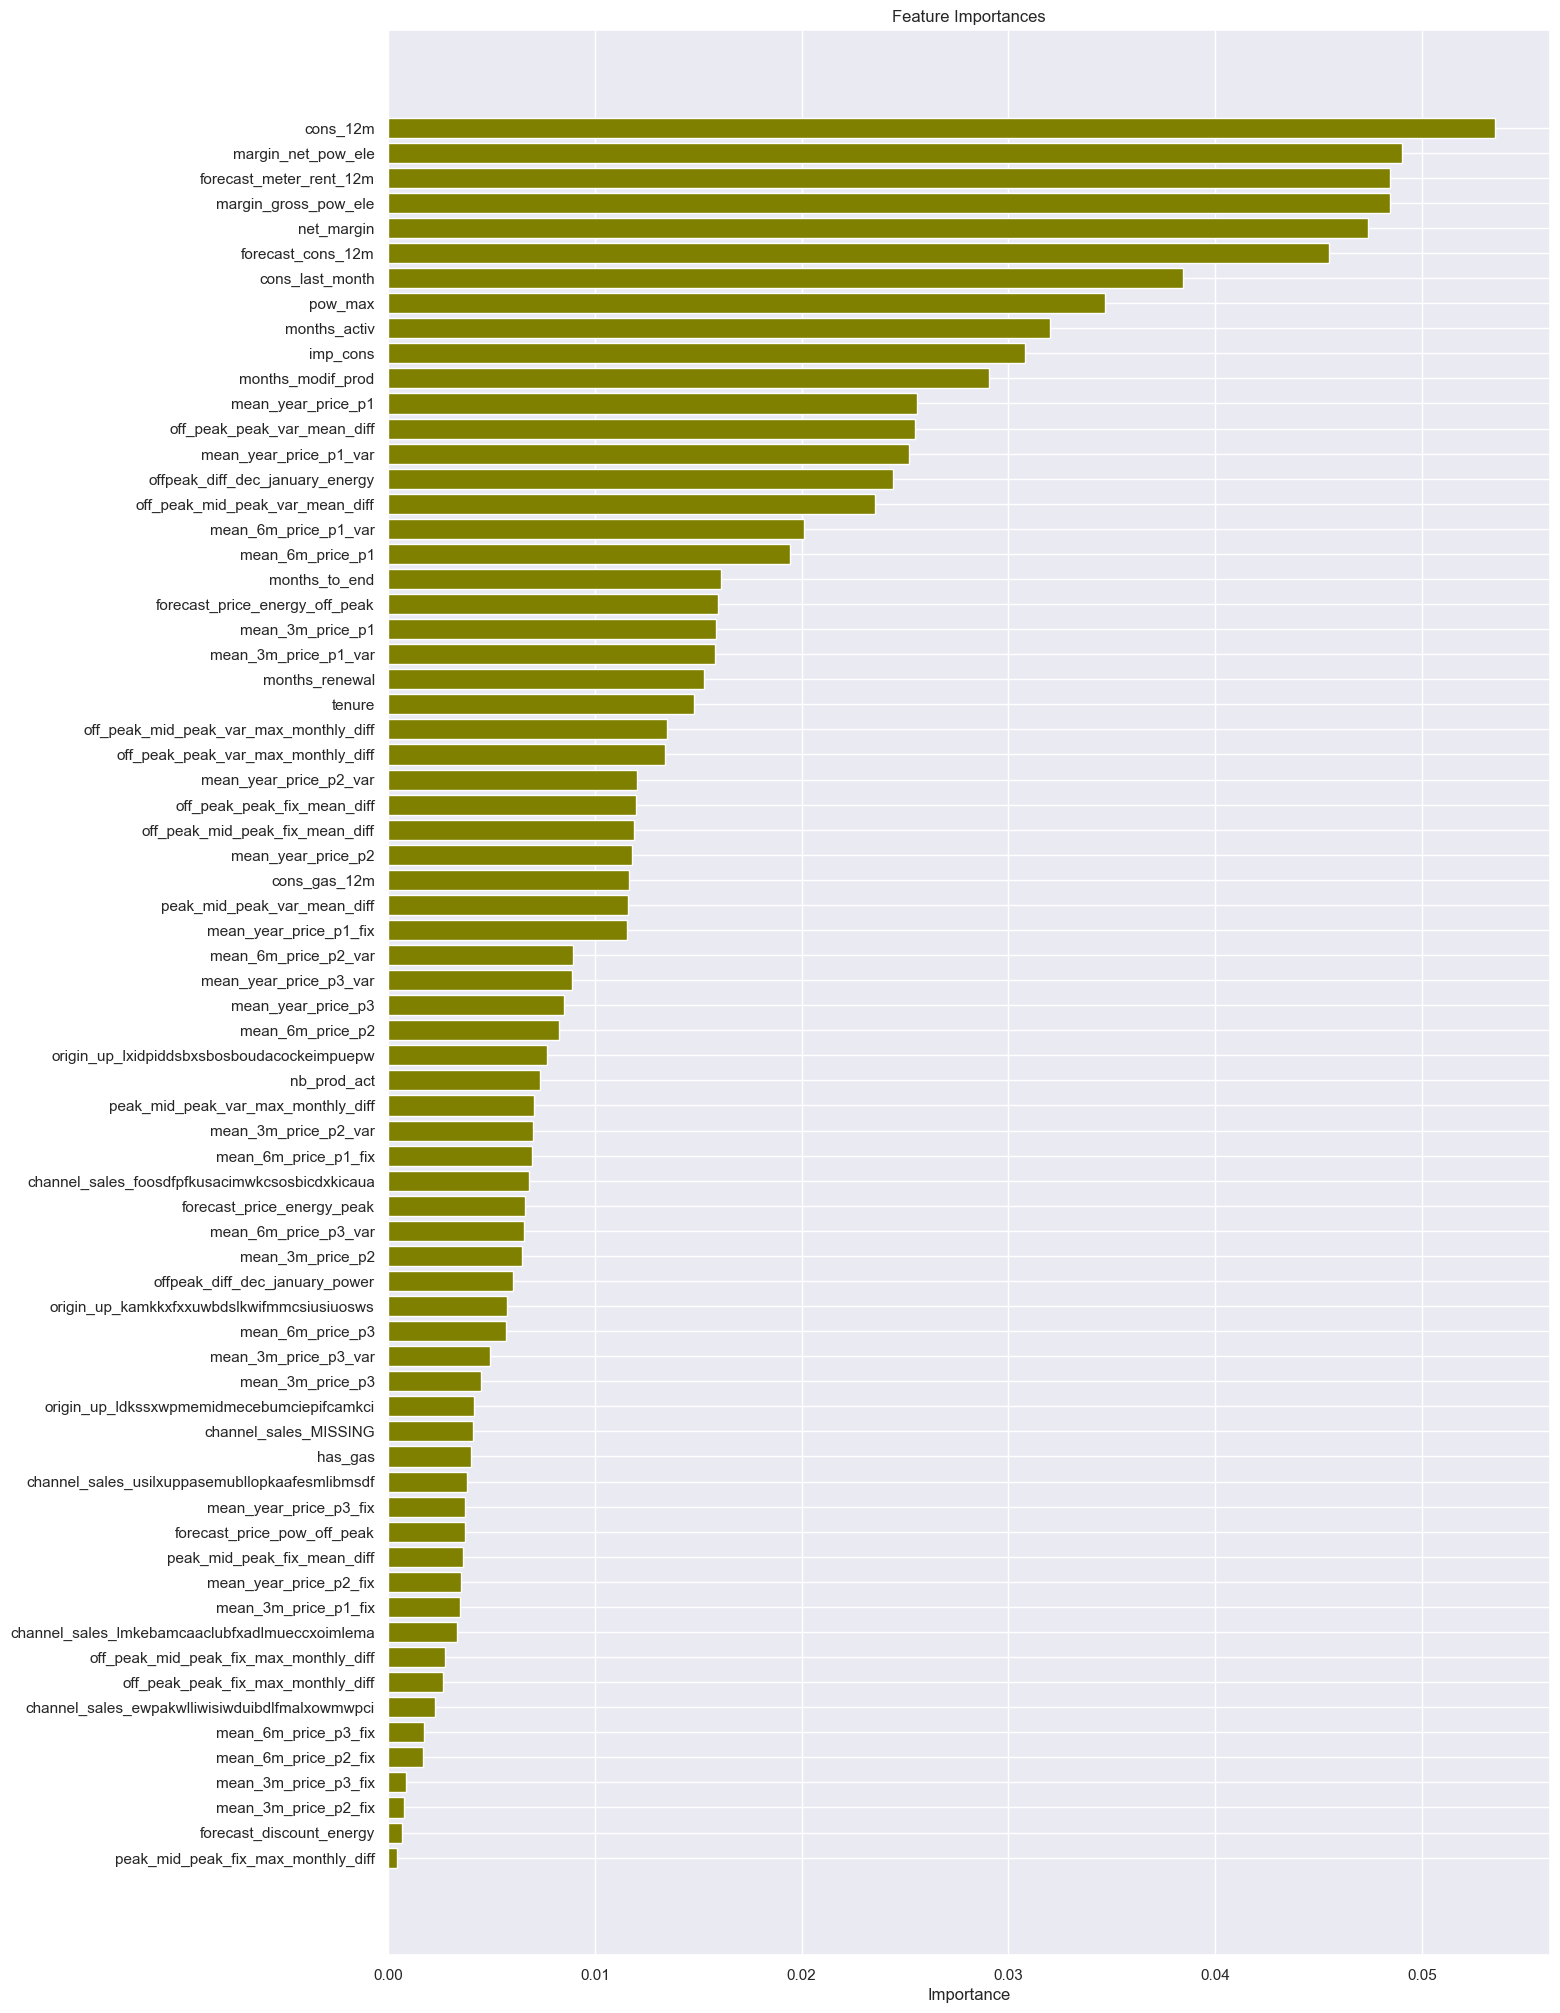

In [31]:
feature_importances = pd.DataFrame({
    'features': X_train.columns,
    'importance': rf_classifier.feature_importances_
}).sort_values(by='importance', ascending=True).reset_index()
plt.figure(figsize=(15, 25))
plt.title('Feature Importances')
plt.barh(range(len(feature_importances)), feature_importances['importance'], color='olive', align='center')
plt.yticks(range(len(feature_importances)), feature_importances['features'])
plt.xlabel('Importance')
plt.show()

From this chart, we can observe the following points:

- Net margin on power subscription and consumption over 12 months is a top driver for churn in this model
- Forecasted bill of meter rental for the next 2 months also is an influential driver
- Time seems to be an influential factor, especially the number of months they have been active, their tenure and the number of months since they updated their contract
- The feature that our colleague recommended is in the top half in terms of how influential it is and some of the features built off the back of this actually outperform it
- Our price sensitivity features are scattered around but are not the main driver for a customer churning

# So, the price is not the main feature for the churning of the customers.